## FBI Crime Regression Model for NYS. 

This is a Thinkful assignment for building a regression model for below data set. 
https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

This data set contains New York State FBI Crime Data for year 2013. Ths goal of this assignment is to build a regression model to predict property crimes using this data set. This assignment will includes data cleaning, feature selections, and finally building the regression model. 

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Our data set have some headers and footers, and we need to skip those headers and footers, and just import our data. 
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv',
                 skiprows=4,skipfooter=3,header=0,na_values='nan')

C:\dev_software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Cleaning

In [3]:
#Let see what our imported data set looks like. 
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0,nan,0,12,18,405,99,291,15,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null object
Violent
crime                           348 non-null object
Murder and
nonnegligent
manslaughter    348 non-null int64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null object
Robbery                                 348 non-null object
Aggravated
assault                      348 non-null object
Property
crime                          348 non-null object
Burglary                                348 non-null object
Larceny-
theft                          348 non-null object
Motor
vehicle
theft                     348 non-null object
Arson3                                  187 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 35.4+ KB


Looks like there are some null values in our data set, like the "Rape (revised definition)1" column and "Arson3" column. We will look at our data set description later and clean up the null values. From df.info, we see that some of the column names are long, and it may be inconvenicent when we use these columns for our model (I am too lazy to type long column names). Therefore, let's replace some of the long column names with shorter ones. 

In [5]:
#List all the column names. 
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [6]:
#Looks like some columns have format issue too. We will fix that as well. 
df.rename(columns={'Violent\ncrime':'Violent Crime'},inplace=True)
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder'},inplace=True)
df.rename(columns={'Rape\n(revised\ndefinition)1':'Rape_1'},inplace=True)
df.rename(columns={'Rape\n(legacy\ndefinition)2':'Rape_2'},inplace=True)
df.rename(columns={'Aggravated\nassault':'Aggravated Assault'},inplace=True)
df.rename(columns={'Property\ncrime':'Property Crime'},inplace=True)
df.rename(columns={'Larceny-\ntheft':'Larceny Theft'},inplace=True)
df.rename(columns={'Motor\nvehicle\ntheft':'Motor Vehicle Theft'},inplace=True)

In [7]:
#Let's check our column names again. 
list(df)

['City',
 'Population',
 'Violent Crime',
 'Murder',
 'Rape_1',
 'Rape_2',
 'Robbery',
 'Aggravated Assault',
 'Property Crime',
 'Burglary',
 'Larceny Theft',
 'Motor Vehicle Theft',
 'Arson3']

From our previous df.info, we can see that the whole column of "Rape (revised definition)1" is null value. The data set declearation did not provide too much information about why this whole colum is all null. Therefore, we will ignore this column while building our regression model. 

For the "Arson3" column, we have some null value here. In the data declearation, it stated that (Arson is not included in the property crime total in this table; however, if complete arson data were provided, they will appear in the arson column.) and (The FBI does not publish arson data unless it receives data from either the agency or the state for all 12 months of the calendar year.) Therefore, null Arson data means the agency or states did not provide the Arson data to the FBI. However, I would like to see the difference between models with Arson and without Arson data. Therefore, for practice purposes, the null Arson will replace with value 0. 

Also, by looking at the df.info, we see that there are only 3 columns contains float and int, the rest are objects, which means some of the number are classfied as str here. It will cause troubles for our model. Hence, we will need to fix this as well. 

In [8]:
df['Population'] = pd.to_numeric(df['Population'].str.replace(',',''))
df['Violent Crime'] = pd.to_numeric(df['Violent Crime'].str.replace(',',''))
df['Rape_2'] = pd.to_numeric(df['Rape_2'].str.replace(',',''))
df['Robbery'] = pd.to_numeric(df['Robbery'].str.replace(',',''))
df['Aggravated Assault'] = pd.to_numeric(df['Aggravated Assault'].str.replace(',',''))
df['Property Crime'] = pd.to_numeric(df['Property Crime'].str.replace(',',''))
df['Burglary'] = pd.to_numeric(df['Burglary'].str.replace(',',''))
df['Larceny Theft'] = pd.to_numeric(df['Larceny Theft'].str.replace(',',''))
df['Motor Vehicle Theft'] = pd.to_numeric(df['Motor Vehicle Theft'].str.replace(',',''))
df['Arson3_fillna'] = df['Arson3'].fillna(0)

In [9]:
print(df.head(10))
print(df.info())

                       City  Population  Violent Crime  Murder  Rape_1  \
0             Adams Village        1861              0       0     nan   
1  Addison Town and Village        2577              3       0     nan   
2             Akron Village        2846              3       0     nan   
3                    Albany       97956            791       8     nan   
4            Albion Village        6388             23       0     nan   
5            Alfred Village        4089              5       0     nan   
6          Allegany Village        1781              3       0     nan   
7              Amherst Town      118296            107       1     nan   
8        Amityville Village        9519              9       0     nan   
9                 Amsterdam       18182             30       0     nan   

   Rape_2  Robbery  Aggravated Assault  Property Crime  Burglary  \
0       0        0                   0              12         2   
1       0        0                   3           

### Feature Selection

According to data declearation, burglary, larceny-theft, and motor vehicle theft considered as property crime. Therefore, these three features will be included in our regression model. Also, population will have impact of property crime number as well, so population will be included in our regression model. 

Next, we will look at the linear relationship between our features and our outcome, which we will look at the linear relationship between burglary, larceny theft, motor vehicle theft, and population compare against our outcome, which is property crime. 

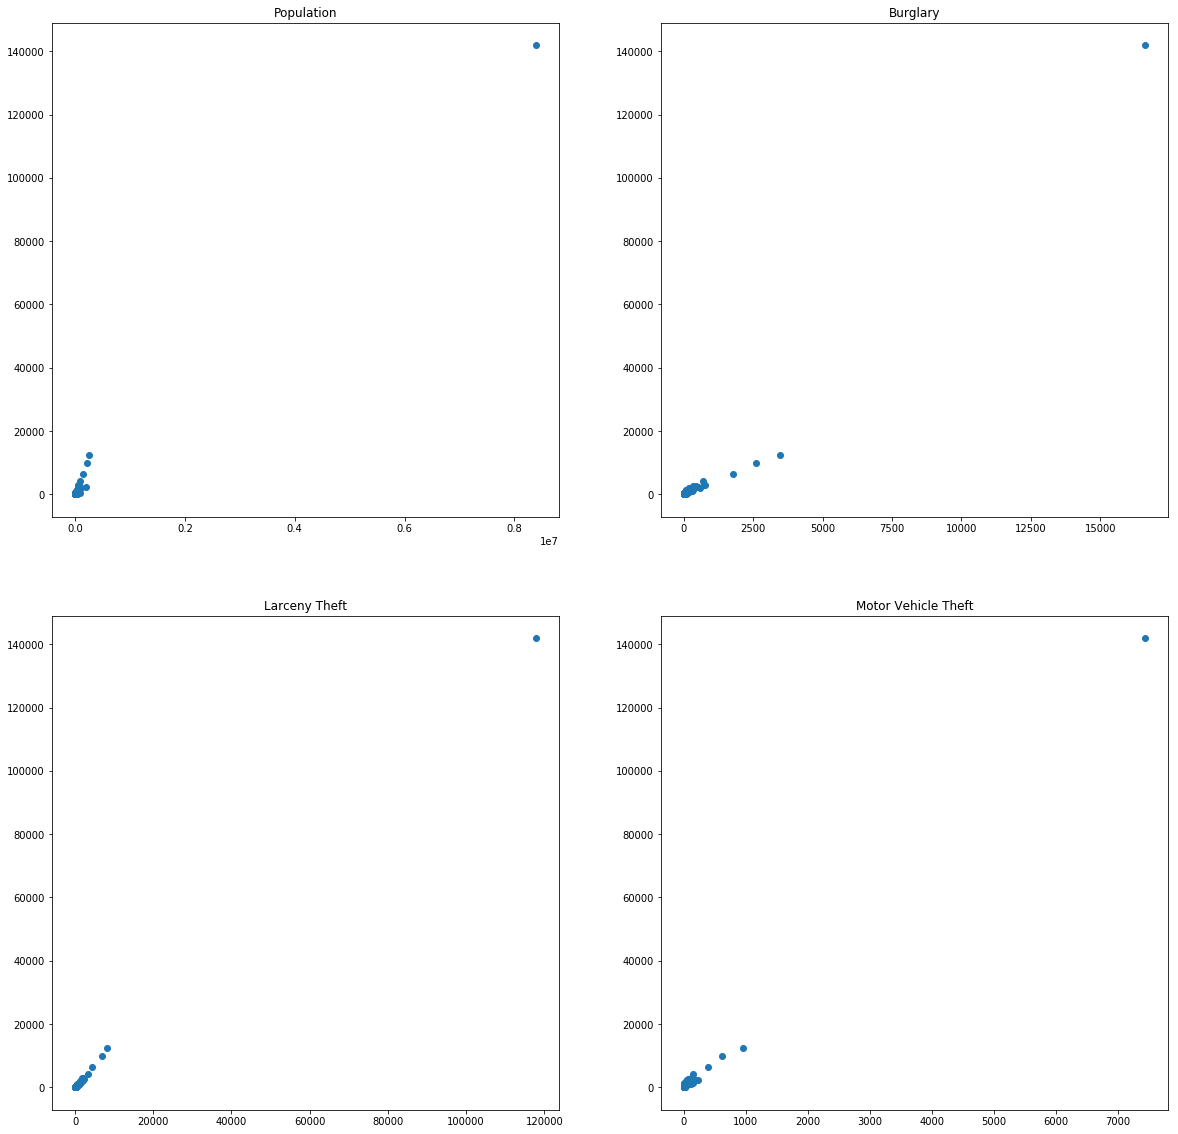

In [10]:
fig = plt.figure(figsize=(20, 20))
G = gridspec.GridSpec(2,2)

axes_1 = plt.subplot(G[0,0])
axes_1.scatter(df['Population'], df['Property Crime'])
axes_1.set_title('Population')

axes_2 = plt.subplot(G[0,1])
axes_2.scatter(df['Burglary'], df['Property Crime'])
axes_2.set_title('Burglary')

axes_3 = plt.subplot(G[1,0])
axes_3.scatter(df['Larceny Theft'], df['Property Crime'])
axes_3.set_title('Larceny Theft')

axes_4 = plt.subplot(G[1,1])
axes_4.scatter(df['Motor Vehicle Theft'], df['Property Crime'])
axes_4.set_title('Motor Vehicle Theft')

plt.show()

According to our above plots, there is a outliner in our data, and we want to delete this outliner so that we can see our plots better. 

In [14]:
#Find the index of the outliner. 
df['Property Crime'][df['Property Crime'] == (df['Property Crime'].max())].index[0]

216

In [17]:
test_df = df.drop(df.index[216])

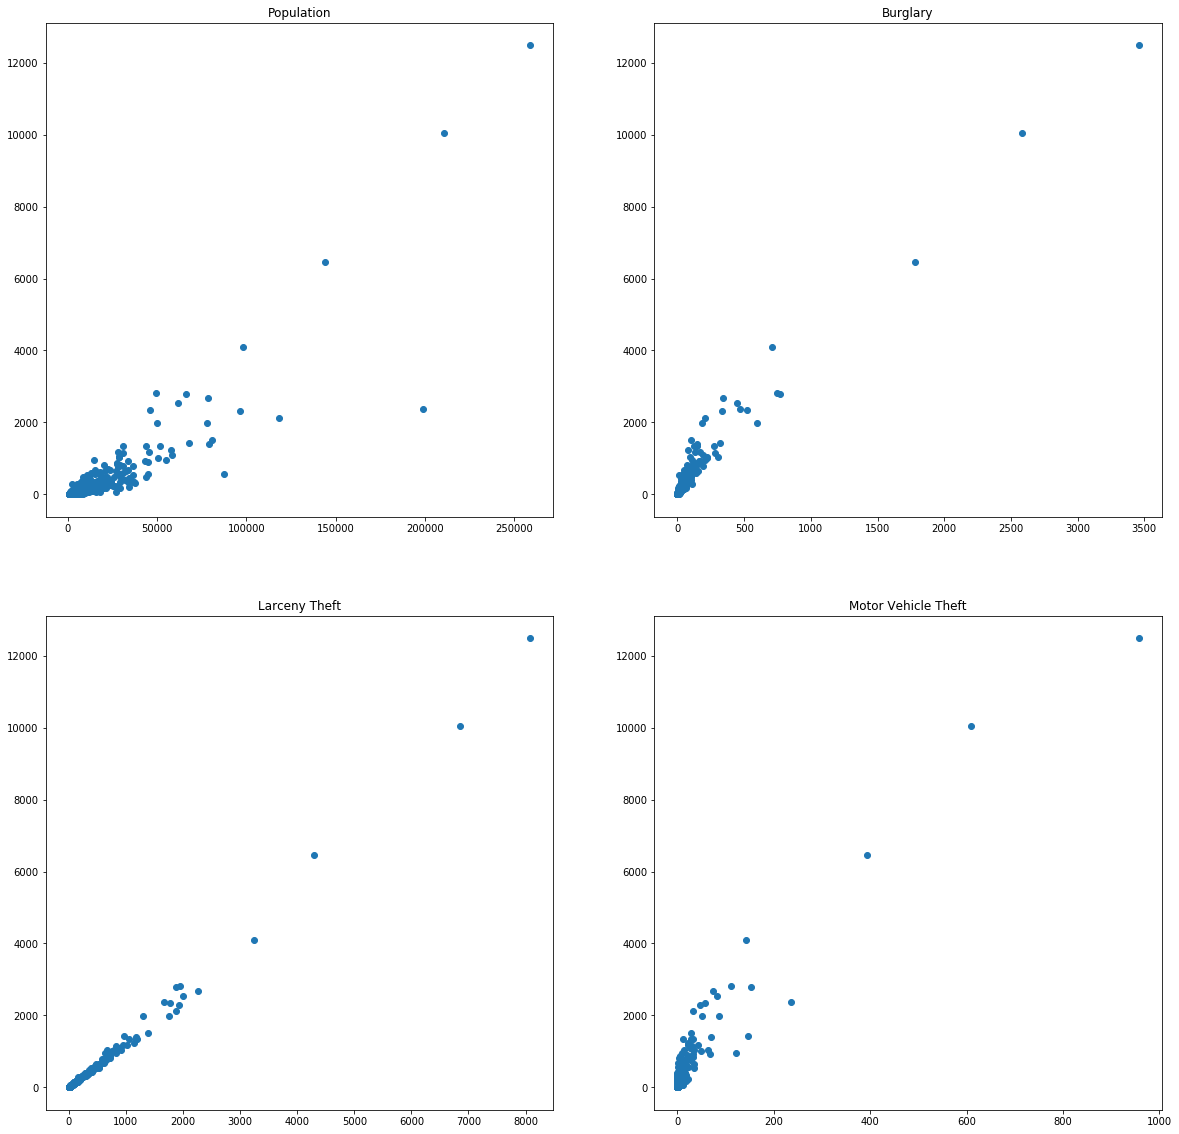

In [18]:
fig = plt.figure(figsize=(20, 20))
G = gridspec.GridSpec(2,2)

axes_1 = plt.subplot(G[0,0])
axes_1.scatter(test_df['Population'], test_df['Property Crime'])
axes_1.set_title('Population')

axes_2 = plt.subplot(G[0,1])
axes_2.scatter(test_df['Burglary'], test_df['Property Crime'])
axes_2.set_title('Burglary')

axes_3 = plt.subplot(G[1,0])
axes_3.scatter(test_df['Larceny Theft'], test_df['Property Crime'])
axes_3.set_title('Larceny Theft')

axes_4 = plt.subplot(G[1,1])
axes_4.scatter(test_df['Motor Vehicle Theft'], test_df['Property Crime'])
axes_4.set_title('Motor Vehicle Theft')

plt.show()

According to above adjusted plots, we see that our features are linear to our outcome. Therefore, we will not do any transformation here. 

Next, we will look at the correlation between our features. For regression models, we want the correlation between our features to be low or nonexistent. High correlation between features is not a problem for prediction. However, it will cause problem when we are evaluating which feature have more prediction power to our outcome. 

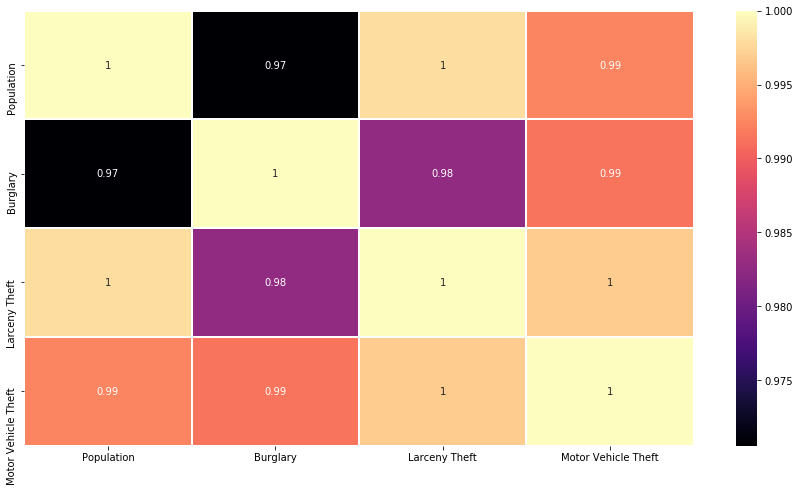

In [20]:
df_features = df[['Population','Burglary','Larceny Theft','Motor Vehicle Theft']]

plt.figure(figsize=(15,8))
sns.heatmap(df_features.corr(),cmap='magma', linecolor='white', linewidths=1, annot=True)

According to the correlation heatmap, our four features have very high correlation. As mentioned previously, high correlated features does not cause problem for prediction. Therefore, we will keep our features for now. 

### Build the Model

We have clean our data and look at our features. Next, we will build the regression model. 

In [23]:
regr = linear_model.LinearRegression()
Y = df['Property Crime']
X = df[['Population','Burglary','Larceny Theft','Motor Vehicle Theft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [2.60374292e-18 1.00000000e+00 1.00000000e+00 1.00000000e+00]

Intercept: 
 0.0

R-squared:
1.0
